- In every dataset we have different columns has different units

- In every dataset we have different columns has different units values varies from -inf to inf

- It is very important to standardize the data, make sure all the column values under same range

- To achive this, we have two methods

        - Normalization

        - Standardization


**Normalization :**
     - min max scalar

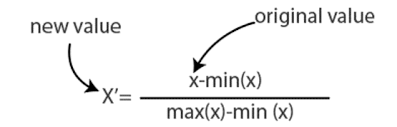

**Standardization**
    - z-score

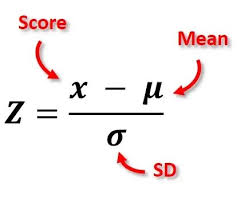

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file_path = "C:\\Users\\Kishan D K\\OneDrive\\Documents\\Data_science\\Data_files\\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,CASE000001,North Am,Master's,Y,Y,67106,1958,Midwest,37301.639919,Year,N,Denied
1,CASE000002,Africa,Bachelor's,N,Y,8604,1978,South,16595.987276,Year,Y,Denied
2,CASE000003,North Am,Doctorate,N,Y,65892,2004,Midwest,23798.265546,Year,Y,Certified
3,CASE000004,Asia,Master's,Y,N,42916,1957,South,23147.729249,Hour,Y,Certified
4,CASE000005,Asia,Master's,Y,Y,87731,2004,West,40611.953414,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,CASE025476,Europe,High School,N,Y,60678,1969,Northeast,36008.381578,Year,N,Denied
25476,CASE025477,Europe,Bachelor's,Y,N,9687,2004,Midwest,45855.045642,Hour,N,Certified
25477,CASE025478,Europe,Doctorate,Y,N,86477,1976,Midwest,42572.951662,Year,N,Denied
25478,CASE025479,Europe,Master's,Y,Y,87627,1976,West,42016.385579,Year,N,Denied


In [11]:
# step-1 Calculate min value of p_wage = min_wage
# step-2 Calculate max value of p_wage = max_wage
# step-3 Dr = max_wage - min_wage
# step-4 Nr = X - min_wage      (x==> p_wage)
# step-5 Nr/Dr

In [15]:
min_wage = visa_df['prevailing_wage'].min()
max_wage = visa_df['prevailing_wage'].max()
dr = max_wage - min_wage
nr = visa_df['prevailing_wage'] - min_wage
visa_df['prevailing_wage_norm'] = nr/dr

In [17]:
visa_df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,37301.639919,0.168177
1,16595.987276,0.053303
2,23798.265546,0.093261
3,23147.729249,0.089652
4,40611.953414,0.186542
...,...,...
25475,36008.381578,0.161002
25476,45855.045642,0.215631
25477,42572.951662,0.197422
25478,42016.385579,0.194334


In [21]:
visa_df['prevailing_wage_norm'].max(),visa_df['prevailing_wage_norm'].min()

(1.0, 0.0)

In [23]:
visa_df['prevailing_wage'].max(),visa_df['prevailing_wage'].min()

(187235.19528210408, 6988.286359218139)

In [25]:
max_id = visa_df['prevailing_wage_norm'].idxmax()
min_id = visa_df['prevailing_wage_norm'].idxmin()
max_id,min_id

(2955, 10442)

In [27]:
visa_df[['prevailing_wage','prevailing_wage_norm']].iloc[[max_id,min_id]]

,prevailing_wage,prevailing_wage_norm
2955,187235.195282,1.0
10442,6988.286359,0.0


**MinMaxScalar**
- MinMaxScalar is a method from sklearn preprocessing
- Read the package
- Save the package
- Apply fit transform

In [36]:
######################## Read the data again   ##################
file_path = "C:\\Users\\Kishan D K\\OneDrive\\Documents\\Data_science\\Data_files\\Visadataset.csv"
visa_df = pd.read_csv(file_path)

# step-1
from sklearn.preprocessing import MinMaxScaler
# step-2
mms = MinMaxScaler()
# step-3
visa_df['prevailing_wage_norm1'] = mms.fit_transform(visa_df[['prevailing_wage']])
visa_df[['prevailing_wage','prevailing_wage_norm1']]

,prevailing_wage,prevailing_wage_norm1
0,37301.639919,0.168177
1,16595.987276,0.053303
2,23798.265546,0.093261
3,23147.729249,0.089652
4,40611.953414,0.186542
...,...,...
25475,36008.381578,0.161002
25476,45855.045642,0.215631
25477,42572.951662,0.197422
25478,42016.385579,0.194334


**z-score**

In [45]:
# step-1 calculate mean
# step-2 calculate std
# step-3 Nr = X-mean
# step-4 Nr/std

mean_wage = visa_df['prevailing_wage'].mean()
std_wage = visa_df['prevailing_wage'].std()
nr = visa_df['prevailing_wage']/mean_wage
visa_df['prevailing_wage_zscore'] = nr/std_wage
visa_df['prevailing_wage_zscore']

0        0.000087
1        0.000039
2        0.000055
3        0.000054
4        0.000095
           ...   
25475    0.000084
25476    0.000107
25477    0.000099
25478    0.000098
25479    0.000059
Name: prevailing_wage_zscore, Length: 25480, dtype: float64

In [47]:
visa_df[['prevailing_wage','prevailing_wage_zscore']]

,prevailing_wage,prevailing_wage_zscore
0,37301.639919,0.000087
1,16595.987276,0.000039
2,23798.265546,0.000055
3,23147.729249,0.000054
4,40611.953414,0.000095
...,...,...
25475,36008.381578,0.000084
25476,45855.045642,0.000107
25477,42572.951662,0.000099
25478,42016.385579,0.000098


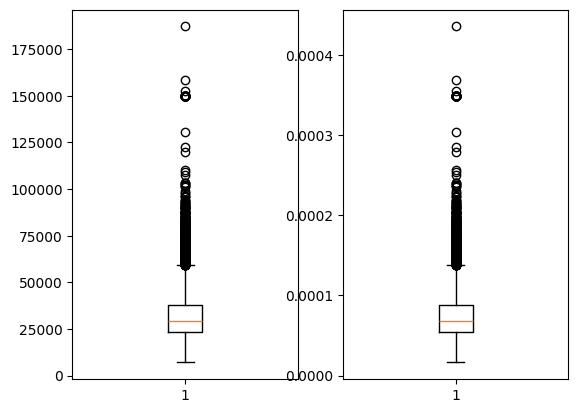

In [51]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage_zscore'])
plt.show()

**StandardScalar**

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(visa_df[['prevailing_wage','prevailing_wage_zscore']])

array([[ 0.40007979,  0.40007979],
       [-1.13998735, -1.13998735],
       [-0.60428861, -0.60428861],
       ...,
       [ 0.79215505,  0.79215505],
       [ 0.75075818,  0.75075818],
       [-0.47806843, -0.47806843]])